<a href="https://colab.research.google.com/gist/JBRKR000/e9d2cff6ebb8ab5ca59cc5caeaa50ca3/emotions-prediction-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
  <h1 style="font-family: Arial, sans-serif; font-size: 36px; color: #333;"><b>Data Science Project</b></h1>
  <h2 style="font-family: Arial, sans-serif; font-size: 28px; color: #555;"><b>Emotion Prediction from English Text</b></h2>
  <h1 style="font-family: Arial, sans-serif; font-size: 32px; color: #333;"><b>Politechnika Bydgoska im. Jana i Jędrzeja Śniadeckich 🏫</b></h1>
  <h3 style="font-family: Arial, sans-serif; font-size: 20px; color: #777;"><b>Year: 2023/2024</b></h3>
  <hr style="border: 1px solid #ccc; margin: 20px 0;">
  <h2 style="font-family: Arial, sans-serif; font-size: 24px; color: #333;"><b>Authors:</b></h2>
  <p style="font-family: Arial, sans-serif; font-size: 20px; color: #555;">Wiktor Lewandowski<br>Jakub Kozimor</p>
</div>




---



<div style="margin-top: 20px; margin-bottom: 20px;">
  <h2 style="font-family: Arial, sans-serif; font-size: 24px;"><b>Project Roadmap 🗺️</b></h2>
  <ol style="font-family: Arial, sans-serif; font-size: 16px; color: #666;">
    <li><strong>Goal:</strong> Analyse emotions in English text.</li>
    <li><strong>Dataset:</strong> <a href="https://www.kaggle.com/datasets/nelgiriyewithana/emotions" target="_blank">Emotions Dataset</a></li>
    <li><strong>Data Exploration:</strong> Load the dataset and visualize its features</li>
    <li><strong>Preprocess the Data:</strong> Handle missing values, label recognition.</li>
    <li><strong>Split the Data:</strong> Divide the dataset into training and testing sets.</li>
    <li><strong>Train the Model:</strong> Fit the model to the training data and eventually tune hyperparameters.</li>
    <li><strong>Evaluate the Model:</strong> Assess the model's performance using testing data and evaluation metrics.</li>
    <li><strong>Results Documentation</strong></li>
    <li><strong>Conclusion</strong></li>
  </ol>
</div>




---



# **Data exploration 🕵️**

<h1><b>Import statements</b></h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## **General dataset overview**

In [ ]:
df = pd.read_csv("emotions-dataset.csv")

In [ ]:
print(f"Rows: {df.shape[0]-1} Columns: {df.shape[1]}\n")
print(f"Column names: {df.columns}\n")

Rows: 416808 Columns: 3

Column names: Index(['Unnamed: 0', 'text', 'label'], dtype='object')



## **Sample Data**

In [ ]:
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


## **Plot label distribution**

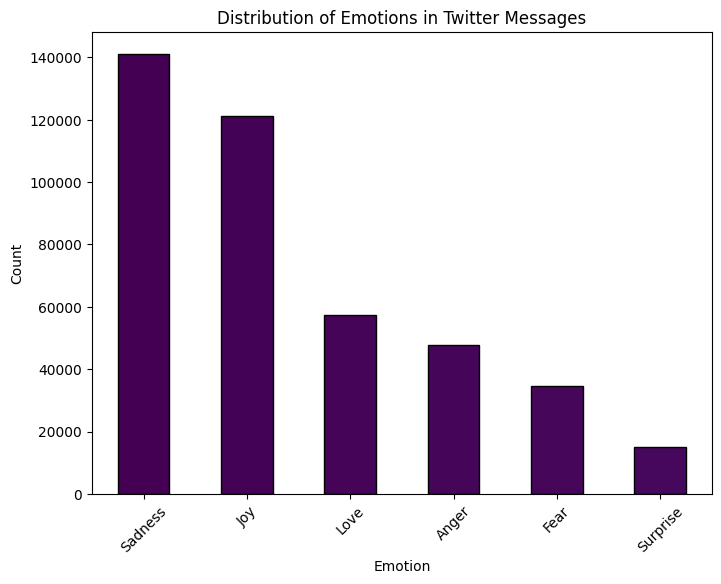

In [ ]:
plt.figure(figsize=(8, 6))
label_counts = df['label'].value_counts()
label_names = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
label_counts.index = label_names
colors = plt.cm.viridis(range(len(label_counts)))
label_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Distribution of Emotions in Twitter Messages')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Preprocessing the data 📖**

## **Check for Duplicates**

In [ ]:
print(f"Are there any duplicates: {df.duplicated().values.any()}\n")

Are there any duplicates: False



## **Check for NaN Values**

In [ ]:
print(f"Are there any NaN values: {df.isna().values.any()}")
print(f"Where are the NaN values:\n{df.isna().sum()}")

Are there any NaN values: False
Where are the NaN values:
Unnamed: 0    0
text          0
label         0
dtype: int64


# **Split the data 🗃️**

In [ ]:
# Split the data into features (X) and labels (y)
X = df['text']  # Features: tweet text
y = df['label']  # Labels: emotions

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (333447,) (333447,)
Testing set shape: (83362,) (83362,)


In [ ]:
# % of training set
train_pct = 100 * len(X_train) / len(X)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100 * len(X_test) / len(X)
print(f'Test data makes up the remaining {test_pct:.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# **Training and evaluating 🔧**


## **Model 1 - Support Vector Machine ⚙️**

Before training machine learning models, it is necessary to convert text data into numeric vectors. In our case, we used the TF-IDF (Term Frequency-Inverse Document Frequency) technique.

The next step is to choose an appropriate machine learning model for the text classification problem. First, we decided to use the Linear Support Vector Classifier (LinearSVC) method, which is a variant of Support Vector Machines (SVM).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
def linear_SVC_train():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    # Vectorize the text data
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Set the model parameters
    model_params = {
        'C': 1.0,
        'loss': 'squared_hinge',
        'max_iter': 1000,
        'penalty': 'l2',
        'dual': True,
        'tol': 1e-4
    }

    # Initialize and train the model
    model = LinearSVC(**model_params)
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

def evaluate_model(model, X_test, y_test):
    # Predict emotions on the test set
    y_pred = model.predict(X_test)
    # Display the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Call the function to train the model
trained_model, trained_vectorizer, X_test, y_test = linear_SVC_train()

# Call the function to evaluate the model
evaluate_model(trained_model, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     24201
           1       0.83      0.92      0.87     28164
           2       0.80      0.73      0.76      6929
           3       0.88      0.80      0.84     11441
           4       0.84      0.77      0.81      9594
           5       0.78      0.69      0.73      3033

    accuracy                           0.86     83362
   macro avg       0.84      0.80      0.82     83362
weighted avg       0.86      0.86      0.85     83362



In our results, we focus on the F1-score as a key metric. F1-score is a combined measure of precision and recall, providing a balanced assessment of a model's performance, especially when classes are unevenly distributed. With our Model 1, we achieved an overall F1-score of 0.82.

In [ ]:
def linear_SVC_train():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    # Vectorize the text data
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Set the model parameters
    model_params = {
        'C': 0.1,
        'loss': 'hinge',
        'max_iter': 5000,
        'penalty': 'l2',
        'dual': True,
        'tol': 1e-4
    }

    # Initialize and train the model
    model = LinearSVC(**model_params)
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

def evaluate_model(model, X_test, y_test):
    # Predict emotions on the test set
    y_pred = model.predict(X_test)
    # Display the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Call the function to train the model
trained_model, trained_vectorizer, X_test, y_test = linear_SVC_train()

# Call the function to evaluate the model
evaluate_model(trained_model, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     24201
           1       0.89      0.96      0.92     28164
           2       0.90      0.70      0.79      6929
           3       0.92      0.89      0.90     11441
           4       0.86      0.86      0.86      9594
           5       0.90      0.63      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.90      0.83      0.86     83362
weighted avg       0.90      0.90      0.90     83362



### **Tweaking Model 1 📈**
The initial F1-score of **0.82** did not meet our expectations. We aimed to improve the model's performance to achieve better results across all classes.

**Approach 👨‍🏫**
1. **TF-IDF Vectorization:** Increased the number of features in TF-IDF vectors from 1000 to 5000 to capture more nuanced information from the text data.
2. **Model Hyperparameters Tuning:**
   - **Regularization Parameter (C):** Decreased from 1.0 to **0.1** to reduce overfitting and enhance model generalization.
   - **Loss Function:** Changed from 'squared_hinge' to '**hinge**' for better performance.
   - **Maximum Number of Iterations:** Increased from 1000 to **5000** to allow the model to converge to a better solution.
   - **Penalty:** Maintained as **L2** for regularization.
   - **Dual:** Kept as **True** for solving the optimization problem.

**Impact on F1-score 💡**
- After implementing these changes, the overall F1-score of the model increased to **0.86**. <br> This enhancement demonstrates the substantial impact of hyperparameters on the model's performance, underscoring the importance of fine-tuning model configurations to achieve optimal results.


### **Trying out Model 1! 💻**

In [ ]:
# Mapping numbers to emotion names
emotion_mapping = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise"
}

# Input texts
input_texts = [
    "good morning mental illness. totally depressed today",
    "The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!!",
    "Perhaps love was the accumulation of small things, little acts of consideration, the persistence of a man in loving even when he receives nothing in return",
    "I WILL DESTROY EVERYTHING THAT COMES IN THE WAY",
    "OMG, you scared the shit out of me!",
    "WOW!!! THAT WAS UNPREDICTABLE!"
]

def predict_emotion_for_text(text):
    # Process the input text using the pre-trained vectorizer
    text_vectorized = trained_vectorizer.transform([text])
    # Predict emotion using the pre-trained model
    predicted_emotion_label = trained_model.predict(text_vectorized)[0]
    # Get the emotion name based on the predicted label
    predicted_emotion = emotion_mapping[predicted_emotion_label]
    return predicted_emotion

# Predicted emotions for the input texts
predicted_emotions = [predict_emotion_for_text(text) for text in input_texts]

# Display predicted emotions for each input text
for i, emotion in enumerate(predicted_emotions):
    print("Predicted emotion for text {}: {}".format(i + 1, emotion))


Predicted emotion for text 1: Sadness
Predicted emotion for text 2: Joy
Predicted emotion for text 3: Love
Predicted emotion for text 4: Joy
Predicted emotion for text 5: Fear
Predicted emotion for text 6: Joy


### **Analysing predictions of Model 1** 🤔

1. "*good morning mental illness. totally depressed today*" was predicted to evoke "Sadness". This aligns with our expectations given the negative sentiment expressed in the text. ✔️

2. "*The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!!*" resulted in the prediction of "Joy". This may stem from the positive and enthusiastic tone of the text. ✔️

3. "*Perhaps love was the accumulation of small things, little acts of consideration, the persistence of a man in loving even when he receives nothing in return*" led to the prediction of "Love," which seems appropriate given the romantic and affectionate nature of the text. ✔️

4. "*I WILL DESTROY EVERYTHING THAT COMES IN THE WAY*" surprisingly resulted in the prediction of "Joy" 😅. This might indicate that the model misinterpreted the context or failed to capture the intended emotion accurately. ❌

5. "*OMG, you scared the shit out of me!*" correctly predicted "Fear," reflecting the alarming and distressing content of the text. ✔️

6. "*WOW!!! THAT WAS UNPREDICTABLE!*" was also predicted to evoke "Joy," perhaps due to the exclamation and excitement conveyed in the text. 🆗

Overall, while our model demonstrated strong performance in predicting emotions such as "Sadness," "Joy," and "Love," it showed relatively weaker performance for emotions like "Fear" and "Surprise," as indicated by lower F1-scores in the classification report. This suggests areas for potential improvement in capturing a broader range of emotional nuances.


## **Model 2 - Logistic Regression ⚙️**

Model 2 utilizes logistic regression, a linear regression-based classification technique commonly employed in machine learning tasks. Logistic regression is particularly suitable for binary classification problems but can also be extended to multi-class classification scenarios, as in our case.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def logistic_regression_classifier():
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    model_params = {
        'C': 0.1,
        'penalty': 'l2',
        'max_iter': 5000,
        'solver': 'saga',
        'random_state': 1
    }

    model = LogisticRegression(**model_params)
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

trained_model, trained_vectorizer, X_test, y_test = logistic_regression_classifier()
evaluate_model(trained_model, X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     24201
           1       0.82      0.93      0.87     28164
           2       0.84      0.67      0.75      6929
           3       0.90      0.77      0.83     11441
           4       0.85      0.75      0.80      9594
           5       0.82      0.63      0.71      3033

    accuracy                           0.85     83362
   macro avg       0.85      0.78      0.81     83362
weighted avg       0.85      0.85      0.85     83362



The F1-score for Model 2 with default configuration was 0.81, indicating its average performance in classifying emotions. This is not a satisfactory result for us, given that we previously achieved a score of 0.86. This suggests a potential need to further optimize the model to improve its ability to recognize different emotions.

In [ ]:
def logistic_regression_classifier():
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    model_params = {
        'C': 0.1,
        'penalty': 'l1',
        'max_iter': 10000,
        'solver': 'saga',
        'random_state': 1
    }

    model = LogisticRegression(**model_params)
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

trained_model, trained_vectorizer, X_test, y_test = logistic_regression_classifier()
evaluate_model(trained_model, X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     24201
           1       0.91      0.94      0.93     28164
           2       0.84      0.79      0.81      6929
           3       0.91      0.91      0.91     11441
           4       0.87      0.86      0.86      9594
           5       0.84      0.72      0.77      3033

    accuracy                           0.91     83362
   macro avg       0.88      0.86      0.87     83362
weighted avg       0.91      0.91      0.91     83362



### **Tweaking Model 2 📈**
In the updated version of Model 2, several key parameters were adjusted to potentially enhance its performance.

**Approach 👨‍🚀**
1. **TF-IDF Vectorization:** Increased the number of features in TF-IDF vectors from 1000 to **5000**.
2. **Model Hyperparameters Tuning:**
   - **Regularization Penalty:** Changed from L2 to **L1** to introduce sparsity and potentially improve feature selection by reducing the impact of less informative features.
   - **Maximum Number of Iterations:** Increased from 5000 to **10000** to allow for a longer convergence time, which might result in a better optimization of the model's parameters.

**Impact on F1-score 🚀**
- The adjustments made to the model had a substantial impact on the F1-score, indicating a significant enhancement in performance. The initial F1-score, hovering around 0.81, received a remarkable boost, soaring to an impressive <font color="gold">0.87</font>! 🥳 <br> This achievement marks a new record in F1-score measurement for our model, surpassing the previous best of 0.86 achieved by Model 1.


## Model 3 - Naive Bayes Classifier ⚙️

Last, but not least, Model 3 leverages the Naive Bayes classifier, an algorithm grounded in Bayes' theorem. Widely used in text analysis and classification, it excels in handling text-centric tasks. One of its key assumptions is feature independence, implying that the occurrence probabilities of distinct features are assessed autonomously. This characteristic is particularly advantageous in text analysis tasks, making Naive Bayes a preferred choice for such applications in data science.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def naive_bayes_classifier():
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    model = MultinomialNB()
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

trained_model, trained_vectorizer, X_test, y_test = naive_bayes_classifier()
evaluate_model(trained_model, X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     24201
           1       0.77      0.97      0.86     28164
           2       0.96      0.42      0.58      6929
           3       0.94      0.76      0.84     11441
           4       0.90      0.68      0.77      9594
           5       0.97      0.24      0.38      3033

    accuracy                           0.83     83362
   macro avg       0.90      0.67      0.72     83362
weighted avg       0.85      0.83      0.82     83362



In [ ]:
def naive_bayes_classifier():
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    model = MultinomialNB(force_alpha=False, alpha=0, fit_prior=False)
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

trained_model, trained_vectorizer, X_test, y_test = naive_bayes_classifier()
evaluate_model(trained_model, X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     24201
           1       0.95      0.85      0.90     28164
           2       0.66      0.91      0.77      6929
           3       0.87      0.90      0.89     11441
           4       0.82      0.85      0.84      9594
           5       0.59      0.87      0.71      3033

    accuracy                           0.87     83362
   macro avg       0.81      0.88      0.83     83362
weighted avg       0.89      0.87      0.88     83362



/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


### **Tweaking Model 3 📈**

In the revised version of the Naive Bayes Classifier model, adjustments were made to its hyperparameters to potentially improve its performance.

**Approach 👨‍✈️**
1. **Model Hyperparameters Tuning:**
   - **Force Alpha:** Disabled, setting `force_alpha` to False to prevent automatic smoothing.
   - **Alpha Value:** Set to 0, indicating no Laplace smoothing, thus avoiding the overfitting that might occur with automatic smoothing.
   - **Fit Prior:** Set to False to disable class prior probability fitting, potentially providing more flexibility in handling imbalanced class distributions.

**Impact on F1-score 🛫**
- The modifications to the Naive Bayes Classifier yielded notable improvements in the F1-score, indicating a significant enhancement in model performance across various classes.
- **Before Adjustments:**
  - **Macro Avg F1-score:** <font color="red">0.72</font>
- **After Adjustments:**
  - **Macro Avg F1-score:** <font color="green">0.83</font>

# Conclusion 📝

## Model Performance 🏆
The logistic regression model, after fine-tuning its hyperparameters and vectorization techniques, emerged as the top-performing model among the ones tested. It achieved an impressive F1-score of 0.87, outperforming both the support vector machine (SVM) and Naive Bayes classifiers.

## Hyperparameter Tuning ⚖️
Tweaking the hyperparameters of each model proved to be crucial in enhancing their performance. For instance, adjusting regularization parameters, selecting appropriate loss functions, and increasing the number of iterations significantly impacted the models' ability to classify emotions accurately.

## Feature Engineering 💡
Utilizing TF-IDF vectorization with an increased number of features (from 1000 to 5000) provided the models with richer representations of text data, leading to improved classification results.

## Model Interpretability 🧠
While logistic regression demonstrated superior performance, it also offers interpretability, making it easier to understand the factors driving its predictions. This interpretability can be valuable in real-world applications where transparency and explainability are paramount.

## Areas for Further Improvement 📈
Despite the success of the logistic regression model, there is still room for improvement, particularly in handling emotions with lower support in the dataset, such as "Surprise" and "Fear." Future iterations of the model could focus on addressing these shortcomings through data augmentation techniques or more sophisticated modeling approaches.

## Confusion Matrix 📊

Let's check the confusion matrix for our top-performing logistic regression model. It compares the actual labels (`y_test`) with the model's predictions (`y_pred`). Each cell shows the count of correctly and incorrectly classified instances for each class pair. Darker cells indicate higher accuracy, while brighter ones highlight areas of misclassification. This visual helps us understand the model's strengths and weaknesses.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

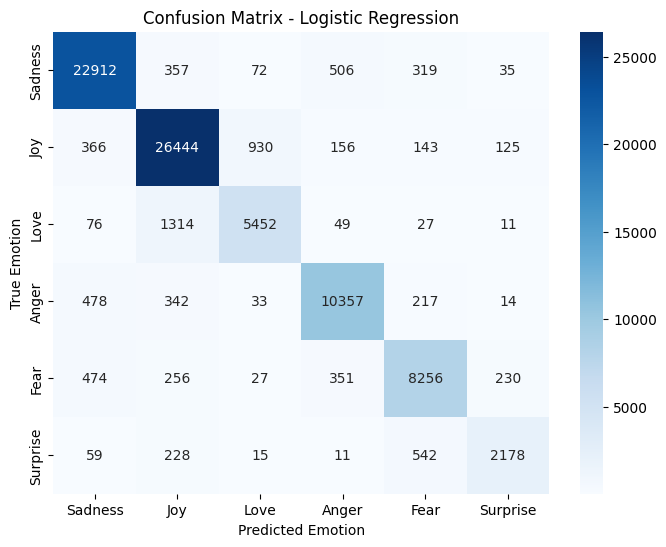

In [ ]:
trained_model, trained_vectorizer, X_test, y_test = logistic_regression_classifier()
y_pred = trained_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
emotions_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=emotions_labels, yticklabels=emotions_labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()
y_pred_prob = trained_model.predict_proba(X_test)

Receiver Operating Characteristic (ROC) Curve 📉
------------------------------------------------

The area under the ROC curve (AUC) quantifies the model's ability to differentiate between positive and negative cases. A higher AUC indicates better classification performance.

Analyzing the ROC curve helps us understand how effectively our model classifies cases at different decision thresholds. It also helps us assess whether the model tends to correctly detect positive cases or if it produces too many false alarms. In summary, the closer the curve is to the top-left corner, the better the model's performance.

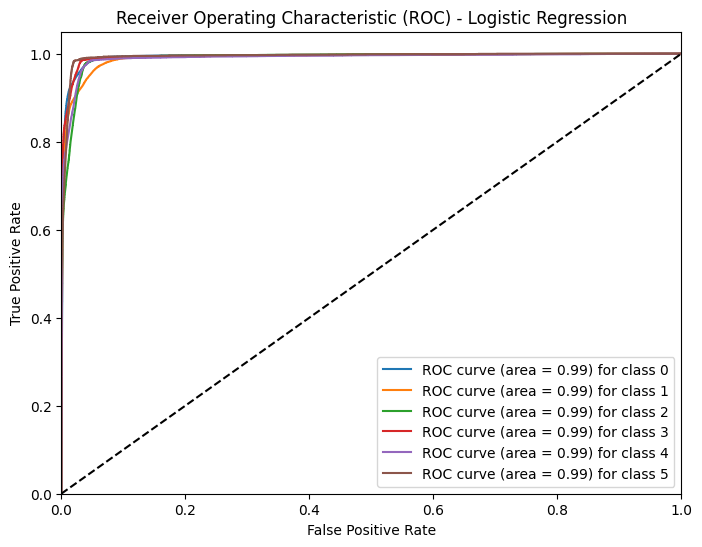

In [ ]:
## Compute ROC curve and ROC area for each class
false_positive_rate = dict()
true_positive_rate = dict()
roc_area = dict()

# Iterate over each class
for class_index in range(len(trained_model.classes_)):
    # Compute ROC curve for the current class
    false_positive_rate[class_index], true_positive_rate[class_index], _ = roc_curve(
        y_test == class_index, y_pred_prob[:, class_index])

    # Compute area under ROC curve for the current class
    roc_area[class_index] = auc(false_positive_rate[class_index], true_positive_rate[class_index])


# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(trained_model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {trained_model.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

For each of the 5 classes, we achieved an impressive AUC (Area Under the Curve) value of **0.99**. This indicates exceptional performance in distinguishing between positive and negative cases across all classes. Such high AUC values suggest that the model has excellent discriminatory power and effectively separates the different classes.